# 6 Boosted decision Trees and random Forests {-}

### 6.1 {-}

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# preprocessing
titanic_df = pd.read_csv('Titanic.csv') # read in titanic data
titanic_df = titanic_df.dropna(axis=1) # drop cols with NA
titanic_df.loc[titanic_df['Sex'] == 'male', 'Sex'] = 0 # convert Sex col to numeric
titanic_df.loc[titanic_df['Sex'] == 'female', 'Sex'] = 1
y = titanic_df[['Survived']] # Target Variable
X = titanic_df.drop(['Survived'], axis=1) # Feature Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train)


     Pclass Sex  SibSp  Parch     Fare
238       2   0      0      0  10.5000
734       2   0      0      0  13.0000
616       3   0      1      1  14.4000
210       3   0      0      0   7.0500
653       3   1      0      0   7.8292
..      ...  ..    ...    ...      ...
820       1   1      1      1  93.5000
458       2   1      0      0  10.5000
37        3   0      0      0   8.0500
461       3   0      0      0   8.0500
163       3   0      0      0   8.6625

[712 rows x 5 columns]


### 6.2 {-}

In [38]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC()
rfc.fit(X_train, y_train.values.ravel())





RandomForestClassifier()

In [39]:
from sklearn.ensemble import GradientBoostingClassifier as GBC 
gbc = GBC()
gbc.fit(X_train, y_train.values.ravel())


GradientBoostingClassifier()

### 6.3 {-}

In [40]:
from sklearn.model_selection import GridSearchCV
# Random Forst hyperparameters:
# n_estimators: 50, 100, 150
# criterion: "gini", "entropy"
# max_depth: 3, 4, 6

params = {"n_estimators":[50,100, 200], "criterion":("gini", "entropy"), "max_depth":[3,4,5]}
rfc = RFC()
rf_clf = GridSearchCV(rfc, params)
rf_clf.fit(X_train, y_train.values.ravel())

print("best hyper parameter combination for Random Forest:")
idx = np.where(rf_clf.cv_results_['rank_test_score'] == 1)[0][0]
best_rf_combo = rf_clf.cv_results_['params'][idx]
print(best_rf_combo)


best hyper parameter combination for Random Forest:
{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}


In [41]:
# learning_rate: 0.1, 0.01,
# n_estimators: 50, 100, 200
# max_depth: 3, 5, 7


params = {"n_estimators":[50,100, 200], "learning_rate":[0.1, 0.01], "max_depth":[3,5,7]}
gbc = GBC()
gb_clf = GridSearchCV(gbc, params)
gb_clf.fit(X_train, y_train.values.ravel())

print("best hyper parameter combination for Gradient Boosting:")
idx = np.where(gb_clf.cv_results_['rank_test_score'] == 1)[0][0]
best_gb_combo = gb_clf.cv_results_['params'][idx]
print(best_gb_combo)

best hyper parameter combination for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


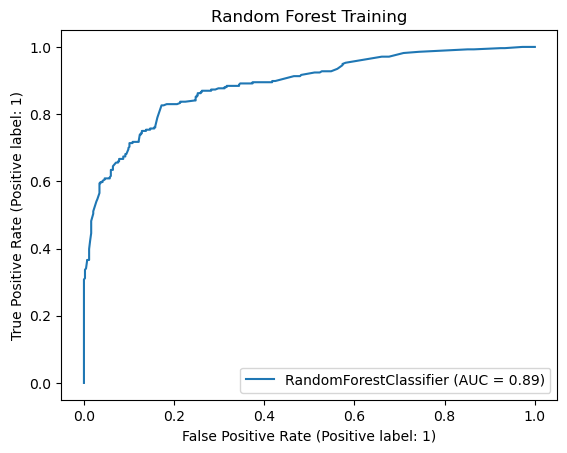

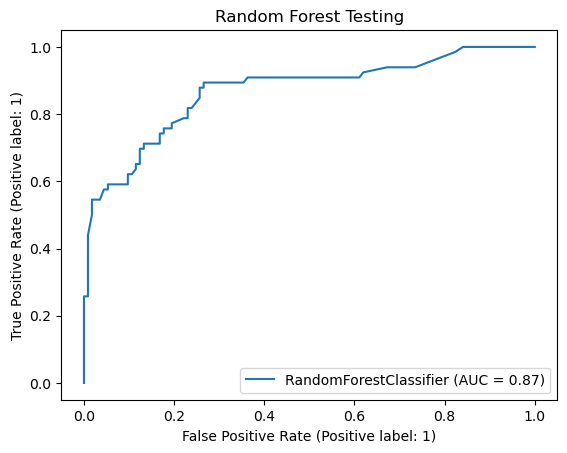

In [42]:
# create ROC Curve
from sklearn import metrics 
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
rfc = RFC(**best_rf_combo)
# train ROC
rfc.fit(X_train, y_train.values.ravel())

RocCurveDisplay.from_estimator(rfc, X_train, y_train.values.ravel())
plt.title('Random Forest Training')
RocCurveDisplay.from_estimator(rfc, X_test, y_test.values.ravel())
plt.title('Random Forest Testing')

plt.show()



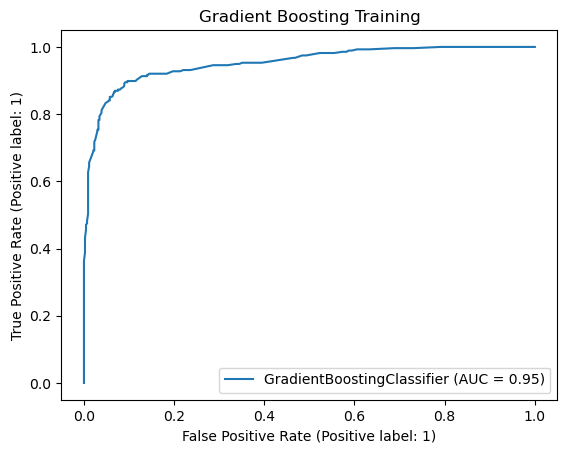

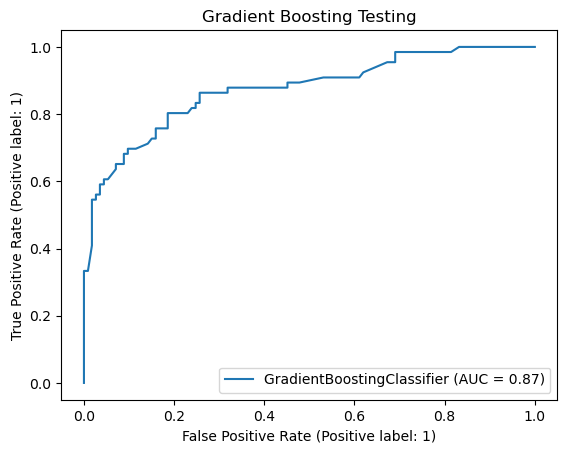

In [43]:
# create ROC Curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
gbc = GBC(**best_gb_combo)
# train ROC
gbc.fit(X_train, y_train.values.ravel())

RocCurveDisplay.from_estimator(gbc, X_train, y_train.values.ravel())
plt.title('Gradient Boosting Training')
RocCurveDisplay.from_estimator(gbc, X_test, y_test.values.ravel())
plt.title('Gradient Boosting Testing')

plt.show()